# Media Twitter Feed Analysis

In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
                "@FOXNEWS", "@NYTIMES")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Create array to hold sentiment
sentiments = []

counter = 1

# Loop through target accounts
for target in target_terms:
    
    oldest_tweet = None
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    # Loop through range to obtain the last 100 tweets by each account
    for loop in range(4):
        public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)
        
        
        for tweet in public_tweets["statuses"]:
            
            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang):
                
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter
                
                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                neutral_list.append(neu)
                negative_list.append(neg)
                
                # Get Tweet ID, subtract 1, and assign to oldest_tweet
                oldest_tweet = int(tweet["id_str"]) - 1
                
                # Add sentiments for each tweet into a list
                sentiments.append({"User": target,
                                   "Tweet": tweet["text"],
                                   "Date": tweet["created_at"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
                # Add to counter
                counter = counter+1

In [4]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,-0.7096,Wed Oct 03 23:36:52 +0000 2018,0.247,0.753,0.000,RT @IykeObedOnuorah: Britain thought nigeria h...,1,@BBC
1,-0.0258,Wed Oct 03 23:35:21 +0000 2018,0.211,0.655,0.135,RT @carolecadwalla: Perfect. I look forward to...,2,@BBC
2,0.5256,Wed Oct 03 23:34:38 +0000 2018,0.000,0.861,0.139,RT @CollectCelticFC: Archie McPherson one of t...,3,@BBC
3,-0.0258,Wed Oct 03 23:33:18 +0000 2018,0.211,0.655,0.135,RT @carolecadwalla: Perfect. I look forward to...,4,@BBC
4,0.0000,Wed Oct 03 23:31:56 +0000 2018,0.000,1.000,0.000,RT @teguando1: One would have expected @channe...,5,@BBC


In [5]:
# Create dataframes for each media site
BBC_df = sentiments_pd.loc[sentiments_pd['User']=='@BBC', :].reset_index(drop=True).head(100)
CBS_df = sentiments_pd.loc[sentiments_pd['User']=='@CBS', :].reset_index(drop=True).head(100) 
CNN_df = sentiments_pd.loc[sentiments_pd['User']=='@CNN', :].reset_index(drop=True) .head(100)
FOX_df = sentiments_pd.loc[sentiments_pd['User']=='@FOXNEWS', :].reset_index(drop=True).head(100) 
NYT_df = sentiments_pd.loc[sentiments_pd['User']=='@NYTIMES', :].reset_index(drop=True).head(100)

# Print to view content
FOX_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,0.6696,Wed Oct 03 23:37:10 +0000 2018,0.000,0.718,0.282,"@FoxNews @RepSwalwell What like Kagan, Ginsber...",475,@FOXNEWS
1,0.0000,Wed Oct 03 23:37:09 +0000 2018,0.000,1.000,0.000,@jamesBond12111 @LeeAnnOwens17 @FoxNews @POTUS...,476,@FOXNEWS
2,-0.4767,Wed Oct 03 23:37:08 +0000 2018,0.134,0.866,0.000,RT @FoxNews: BREAKING: Man arrested in GOP dox...,477,@FOXNEWS
3,0.4019,Wed Oct 03 23:37:08 +0000 2018,0.000,0.812,0.188,@GuruIndi @FoxNews @benshapiro For an innocent...,478,@FOXNEWS
4,0.0000,Wed Oct 03 23:37:07 +0000 2018,0.000,1.000,0.000,@FoxNews I predict a white male 30-40. Ex mili...,479,@FOXNEWS


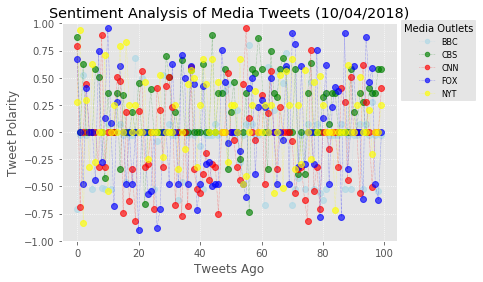

In [6]:
# Scatter Plot
BBC_plt = plt.plot(np.arange(len(BBC_df["Compound"])),BBC_df["Compound"], marker="o",
                   linewidth=0.5,alpha=0.65, color='lightblue',
                   linestyle=':')

CBS_plt = plt.plot(np.arange(len(CBS_df["Compound"])),CBS_df["Compound"], marker="o",
                   linewidth=0.5,alpha=0.65, color='green',
                   linestyle=':')

CNN_plt = plt.plot(np.arange(len(CNN_df["Compound"])),CNN_df["Compound"], marker="o",
                   linewidth=0.5,alpha=0.65, color='red',
                   linestyle=':')

FOX_plt = plt.plot(np.arange(len(FOX_df["Compound"])),FOX_df["Compound"], marker="o",
                   linewidth=0.5,alpha=0.65, color='blue',
                   linestyle=':')
                   
NYT_plt = plt.plot(np.arange(len(NYT_df["Compound"])),NYT_df["Compound"], marker="o",
                   linewidth=0.5,alpha=0.65, color='yellow',
                   linestyle=':')

#Add additional chart formatting 
plt.grid(linestyle='dotted')
plt.title("Sentiment Analysis of Media Tweets (10/04/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1,1)
plt.legend(('BBC', 'CBS', 'CNN', 'FOX', 'NYT'),scatterpoints=1,
           loc='upper left',bbox_to_anchor=(1.0, 1.035),ncol=1,\
           fontsize=8, markerscale=0.75,
           title='Media Outlets',edgecolor='none',framealpha=1.00)

plt.savefig("Media_Aggregate_Analysis.png")
plt.show()

In [7]:
# Media sentiments by compound averages
BBC_agg = BBC_df['Compound'].mean()
CBS_agg = CBS_df['Compound'].mean()
CNN_agg = CNN_df['Compound'].mean()
FOX_agg = FOX_df['Compound'].mean()
NYT_agg = NYT_df['Compound'].mean()

#Print all compound averages
print(BBC_agg, CBS_agg, CNN_agg, FOX_agg, NYT_agg)

-0.056297999999999994 0.199257 -0.064451 0.005928999999999995 0.11343199999999999


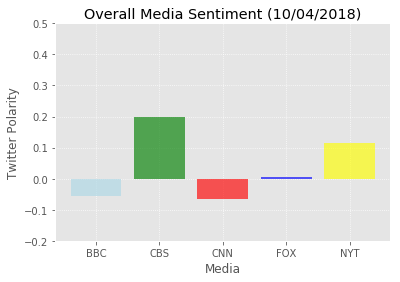

In [9]:
# Box Plot for all Media Tweets 
media_agg = ['BBC', 'CBS', 'CNN', 'FOX', 'NYT']
sentiment = [-0.0563, 0.1992, -0.0644, 0.0059, 0.1134]
x_axis = np.arange(len(sentiment))

colors = ['lightblue', 'green', 'red', 'blue', 'yellow']

plt.bar(x_axis, sentiment, color=colors, alpha=0.65, align='edge')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.ylim(-.2, .5)

plt.grid(linestyle='dotted')
plt.title("Overall Media Sentiment (10/04/2018)")
plt.xlabel("Media")
plt.ylabel("Twitter Polarity")

plt.savefig("Overall_Media_Sentiment.png")
plt.show()